# Glass quality assessment



**Credit: [AITS Cainvas Community](https://discord.gg/x6xn39u)**

![](https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/glass.gif)

*Photo by [Maggle](https://dribbble.com/shots/2558359-Face3) on [Dribbble](https://dribbble.com)*

The quality of a glass refers to its transparency, heat resistance, stability etc. It depends on many features such as thickness, composition, and many others. 

Here, we use deep neural networks to categorize glass samples based on its features.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix
import random
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# The dataset

[On Kaggle](https://www.kaggle.com/kunalvsingh93/glass-quality-classification) by [Kunal V Singh](https://www.kaggle.com/kunalvsingh93)

The dataset is a CSV file with 15 features categories for each sample. There are 2 categories of glass samples - 1 and 2.

In [2]:
df = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/Glass_train.csv')
df

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0,1,133,37,583,599,54808,55435,319,319.230467,0,0,0,0,0,1
1354,0,1,145,35,1169,1192,293279,293314,467,467.349309,0,0,0,0,0,2
1355,0,1,145,47,1197,1203,818707,818988,316,316.449571,0,0,0,1,0,1
1356,1,0,126,84,651,672,2162298,2162999,122,122.518578,0,0,0,0,0,2


# Preprocessing

## Removing redundant features

Let us look at the correlation between the feature categories - 

In [3]:
corr = df.corr()
corr

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
grade_A_Component_1,1.000000,-1.000000,-0.179342,0.102448,0.122591,0.090869,0.075011,0.074997,-0.288747,-0.288750,-0.060848,0.357737,-0.410352,-0.150293,-0.085870,-0.017173
grade_A_Component_2,-1.000000,1.000000,0.179342,-0.102448,-0.122591,-0.090869,-0.075011,-0.074997,0.288747,0.288750,0.060848,-0.357737,0.410352,0.150293,0.085870,0.017173
max_luminosity,-0.179342,0.179342,1.000000,-0.084196,-0.064511,-0.052570,-0.047701,-0.047675,0.093665,0.093664,-0.050434,-0.194116,0.150255,0.071122,0.018768,0.031459
thickness,0.102448,-0.102448,-0.084196,1.000000,0.132322,0.102853,-0.215164,-0.215179,-0.222397,-0.222396,0.067869,-0.027194,-0.345223,-0.098207,0.016376,0.329639
xmin,0.122591,-0.122591,-0.064511,0.132322,1.000000,0.986944,0.052343,0.052325,-0.373870,-0.373869,0.131579,-0.237880,-0.397686,0.071128,0.110482,0.147477
xmax,0.090869,-0.090869,-0.052570,0.102853,0.986944,1.000000,0.065922,0.065907,-0.264107,-0.264106,0.115860,-0.267536,-0.315293,0.058899,0.103368,0.130023
ymin,0.075011,-0.075011,-0.047701,-0.215164,0.052343,0.065922,1.000000,1.000000,0.006516,0.006514,0.016542,-0.071391,0.018013,-0.062412,0.051208,-0.092489
ymax,0.074997,-0.074997,-0.047675,-0.215179,0.052325,0.065907,1.000000,1.000000,0.006556,0.006553,0.016565,-0.071419,0.018027,-0.062421,0.051208,-0.092485
pixel_area,-0.288747,0.288747,0.093665,-0.222397,-0.373870,-0.264107,0.006516,0.006556,1.000000,1.000000,-0.098369,-0.112656,0.677638,-0.086455,-0.064310,-0.214127
log_area,-0.288750,0.288750,0.093664,-0.222396,-0.373869,-0.264106,0.006514,0.006553,1.000000,1.000000,-0.098368,-0.112655,0.677639,-0.086454,-0.064311,-0.214127


In [4]:
# There are many column pairs with high correlation, thus acting as duplicates. 
# We can drop a column if there is a correlation = 1 or -1

final_columns = list(df.columns)    # maintaining a temporary list to remove columns from

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        #print(abs(corr.iloc[i,j]), list(df.columns)[i], list(df.columns)[j])
        if abs(corr.iloc[i, j]) > 0.98:    # if very high correlation            
            if list(df.columns)[j] in final_columns:    # if not aldready removed
                final_columns.remove(list(df.columns)[j])    # remove

df = df[final_columns]    # selecting only the required columns

df  

,grade_A_Component_1,max_luminosity,thickness,xmin,ymin,pixel_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,150,36,144,947225,439,0,0,1,0,0,1
1,1,134,55,1144,2379058,329,1,0,0,0,0,1
2,1,135,65,950,1038442,300,0,0,0,0,0,2
3,0,123,35,41,1705580,6803,0,0,1,0,0,1
4,1,138,69,462,1088124,251,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0,133,37,583,54808,319,0,0,0,0,0,1
1354,0,145,35,1169,293279,467,0,0,0,0,0,2
1355,0,145,47,1197,818707,316,0,0,0,1,0,1
1356,1,126,84,651,2162298,122,0,0,0,0,0,2


4 columns have been removed
* grade_A_Component_2 (inverted grade_A_component_1)  
* xmax and ymax are very clodely related to xmin and ymin respectively
* log area is directly related to pixel_area

## Balancing the dataset

In [5]:
df['class'].value_counts()

1    887
2    471
Name: class, dtype: int64

It is an unbalanced dataset.

In order to balance the dataset, there are two options,

* upsampling - resample the values to make their count equal to the class label with the higher count (here, 887).
* downsampling - pick n samples from each class label where n = number of samples in class with least count (here, 471)

Here, we will be upsampling.

In [6]:
# Spltting into one dataframe for each category.
df_1 = df[df['class'] == 1]
df_2 = df[df['class'] == 2]

# Resampling
df_2 = df_2.sample(len(df_1), replace = True)

# Concatenating the two to form a single dataset
df = df_2.append(df_1)

# Spread of values in categories
df['class'].value_counts()

2    887
1    887
Name: class, dtype: int64

## Renaming the classes

Since this is a binary classification problem, we will rename samples belonging to class 2 as class 0, thus making the two categories for classification 0 and 1.

In [7]:
df['class'] = (df['class'] == 1).astype('int')
df

,grade_A_Component_1,max_luminosity,thickness,xmin,ymin,pixel_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
434,1,128,79,1603,2932768,266,0,0,0,0,0,0
104,0,156,43,123,204090,357,0,0,0,0,0,0
1072,0,142,41,405,761984,291,0,0,0,0,0,0
1286,0,137,75,1253,1230135,522,0,0,0,0,0,0
870,1,111,85,800,2182744,128,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1349,0,145,50,1199,1424645,60,0,0,0,1,0,1
1350,0,141,43,42,2698514,6504,0,0,1,0,0,1
1351,1,126,115,262,849397,179,0,0,0,0,0,1
1353,0,133,37,583,54808,319,0,0,0,0,0,1


In [8]:
input_columns = df.columns[:-1].to_list()
output_columns = [df.columns[-1]]

input_columns, output_columns

(['grade_A_Component_1',
  'max_luminosity',
  'thickness',
  'xmin',
  'ymin',
  'pixel_area',
  'x_component_1',
  'x_component_2',
  'x_component_3',
  'x_component_4',
  'x_component_5'],
 ['class'])

## Train val test split

In [9]:
# Splitting into train, val and test set -- 80-10-10 split

# First, an 80-20 split
train_df, val_test_df = train_test_split(df, test_size = 0.2, random_state = 3)

# Then split the 20% into half
val_df, test_df = train_test_split(val_test_df, test_size = 0.5, random_state = 3)

print("Number of samples in...")
print("Training set: ", len(train_df))
print("Validation set: ", len(val_df))
print("Testing set: ", len(test_df))

Number of samples in...
Training set:  1419
Validation set:  177
Testing set:  178


In [10]:
val_df['class'].value_counts(), test_df['class'].value_counts()

(1    89
 0    88
 Name: class, dtype: int64,
 1    93
 0    85
 Name: class, dtype: int64)

In [11]:
# Splitting into X (input) and y (output)

Xtrain, ytrain = np.array(train_df[input_columns]), np.array(train_df[output_columns])

Xval, yval = np.array(val_df[input_columns]), np.array(val_df[output_columns])

Xtest, ytest = np.array(test_df[input_columns]), np.array(test_df[output_columns])

## Scaling the values

As the feature values are on different scales, we use MinMaxScaler to scale the values to the range [0,1].

In [12]:
# Each feature has a different range. 
# Using min_max_scaler to scale them to values in the range [0,1].

min_max_scaler = MinMaxScaler()

# Fit on training set alone
Xtrain = min_max_scaler.fit_transform(Xtrain)

# Use it to transform val and test input
Xval = min_max_scaler.transform(Xval)
Xtest = min_max_scaler.transform(Xtest)

# The model

In [13]:
model = Sequential([
    Dense(128, activation = 'relu', input_shape = Xtrain[0].shape),
    Dense(64, activation = 'relu'),
    Dense(16, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

cb = [EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)]

In [14]:
model.compile(optimizer = Adam(0.01), loss = BinaryCrossentropy(), metrics=['accuracy'])

history = model.fit(Xtrain, ytrain, validation_data = (Xval, yval), epochs = 256, callbacks=cb)

Epoch 1/256
45/45 [==============================] - 0s 3ms/step - loss: 0.3891 - accuracy: 0.8147 - val_loss: 0.3662 - val_accuracy: 0.8192
Epoch 2/256
45/45 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8520 - val_loss: 0.3567 - val_accuracy: 0.8362
Epoch 3/256
45/45 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8443 - val_loss: 0.3741 - val_accuracy: 0.8362
Epoch 4/256
45/45 [==============================] - 0s 1ms/step - loss: 0.3172 - accuracy: 0.8485 - val_loss: 0.3577 - val_accuracy: 0.8249
Epoch 5/256
45/45 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.8485 - val_loss: 0.3563 - val_accuracy: 0.8192
Epoch 6/256
45/45 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8478 - val_loss: 0.3493 - val_accuracy: 0.8305
Epoch 7/256
45/45 [==============================] - 0s 1ms/step - loss: 0.3106 - accuracy: 0.8485 - val_loss: 0.3620 - val_accuracy: 0.8192
Epoch 8/256
4

In [15]:
model.compile(optimizer = Adam(0.001), loss = BinaryCrossentropy(), metrics=['accuracy'])

history1 = model.fit(Xtrain, ytrain, validation_data = (Xval, yval), epochs = 256, callbacks=cb)

Epoch 1/256
45/45 [==============================] - 0s 3ms/step - loss: 0.2878 - accuracy: 0.8675 - val_loss: 0.3509 - val_accuracy: 0.8362
Epoch 2/256
45/45 [==============================] - 0s 1ms/step - loss: 0.2830 - accuracy: 0.8710 - val_loss: 0.3544 - val_accuracy: 0.8305
Epoch 3/256
45/45 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.8703 - val_loss: 0.3525 - val_accuracy: 0.8249
Epoch 4/256
45/45 [==============================] - 0s 1ms/step - loss: 0.2813 - accuracy: 0.8682 - val_loss: 0.3542 - val_accuracy: 0.8418
Epoch 5/256
45/45 [==============================] - 0s 1ms/step - loss: 0.2810 - accuracy: 0.8739 - val_loss: 0.3539 - val_accuracy: 0.8418
Epoch 6/256
45/45 [==============================] - 0s 1ms/step - loss: 0.2803 - accuracy: 0.8689 - val_loss: 0.3538 - val_accuracy: 0.8418
Epoch 7/256
45/45 [==============================] - 0s 1ms/step - loss: 0.2798 - accuracy: 0.8703 - val_loss: 0.3521 - val_accuracy: 0.8249
Epoch 8/256
4

In [16]:
model.evaluate(Xtest, ytest)

6/6 [==============================] - 0s 618us/step - loss: 0.2740 - accuracy: 0.8820


[0.27404099702835083, 0.882022500038147]

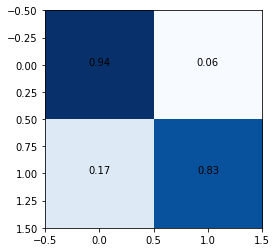

In [17]:
cm = confusion_matrix(ytest, (model.predict(Xtest)>0.5).astype('int'))
cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[1]):
    for j in range(cm.shape[0]):
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="black")


plt.imshow(cm, cmap=plt.cm.Blues)

# Plotting the metrics

In [18]:
def plot(history1, history2, variable1, variable2):
    # combining metrics from both trainings    
    var1_history = history1[variable1]
    var1_history.extend(history2[variable1])
    
    var2_history = history1[variable2]
    var2_history.extend(history2[variable2])
    
    # plotting them
    plt.plot(range(len(var1_history)), var1_history)
    plt.plot(range(len(var2_history)), var2_history)
    plt.legend([variable1, variable2])
    plt.title(variable1)

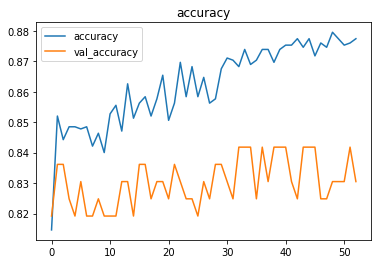

In [19]:
plot(history.history, history1.history, "accuracy", 'val_accuracy')

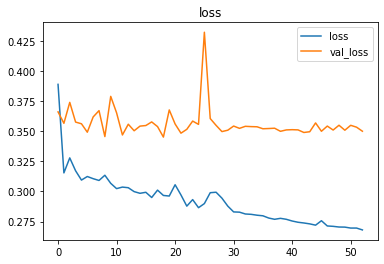

In [20]:
plot(history.history, history1.history, "loss", 'val_loss')

# Prediction

In [21]:
# pick random test data sample from one batch
x = random.randint(0, len(Xtest) - 1)

output = model.predict(Xtest[x].reshape(1, -1))[0]
pred = (output>0.5).astype('int')[0]    # finding category

print("Predicted: ", pred, "(", output[0], "-->", pred, ")")    
print("True: ", ytest[x][0])

Predicted:  0 ( 0.18781039 --> 0 )
True:  0


# deepC

In [22]:
model.save('glass.h5')

!deepCC glass.h5

[INFO]
Reading [keras model] 'glass.h5'
[SUCCESS]
Saved 'glass.onnx'
[INFO]
Reading [onnx model] 'glass.onnx'
[INFO]
Model info:
  ir_vesion : 4
  doc       : 
[WARNING]
[ONNX]: terminal (input/output) dense_input's shape is less than 1. Changing it to 1.
[WARNING]
[ONNX]: terminal (input/output) dense_3's shape is less than 1. Changing it to 1.
WARN (GRAPH): found operator node with the same name (dense_3) as io node.
[INFO]
Running DNNC graph sanity check ...
[SUCCESS]
Passed sanity check.
[INFO]
Writing C++ file 'glass_deepC/glass.cpp'
[INFO]
deepSea model files are ready in 'glass_deepC/' 
[RUNNING COMMAND]
g++ -std=c++11 -O3 -fno-rtti -fno-exceptions -I. -I/opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/include -isystem /opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/packages/eigen-eigen-323c052e1731 glass_deepC/glass.cpp -o glass_deepC/glass.exe
[RUNNING COMMAND]
size "glass_deepC/glass.exe"
   text	   data	   

In [23]:
# pick random test data sample from one batch
x = random.randint(0, len(Xtest) - 1)

np.savetxt('sample.data', Xtest[x])    # xth sample into text file

# run exe with input
!glass_deepC/glass.exe sample.data

# show predicted output
nn_out = np.loadtxt('deepSea_result_1.out')

pred = (nn_out>0.5).astype('int')    # finding category

print("\nPredicted: ", pred, "(", nn_out, "-->", pred, ")")    
print("True: ", ytest[x][0])

reading file sample.data.
writing file deepSea_result_1.out.

Predicted:  1 ( 1.0 --> 1 )
True:  1
